# Stroke Health Care Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_selection import SelectKBest, chi2
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\\projects\\DS Internship datasets\\project 1\\healthcare-dataset-stroke-data.csv")

### Data preprocessing 

In [3]:
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

only in bmi missing values are present.

In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

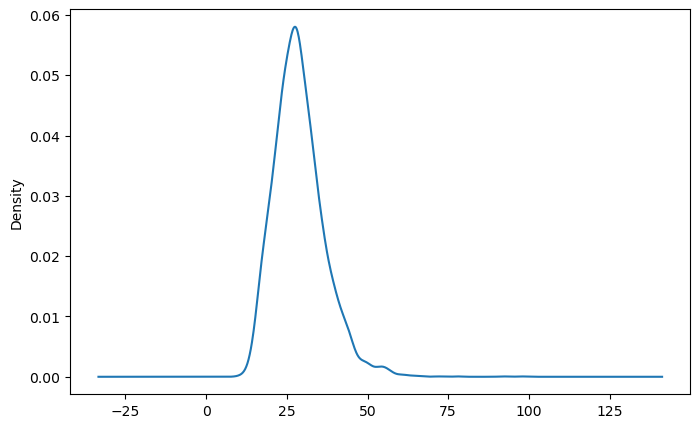

In [10]:
plt.figure(figsize=(8,5))
df['bmi'].plot(kind='kde')
plt.show()

### Replacing Missing Values

In [11]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [12]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
df.drop(['id'],axis=1,inplace=True)

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA

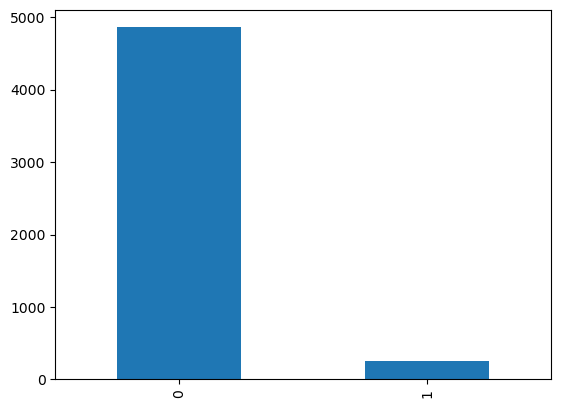

In [15]:
df['stroke'].value_counts().plot(kind='bar')
plt.show()

In [16]:
n=df.select_dtypes(exclude='object')

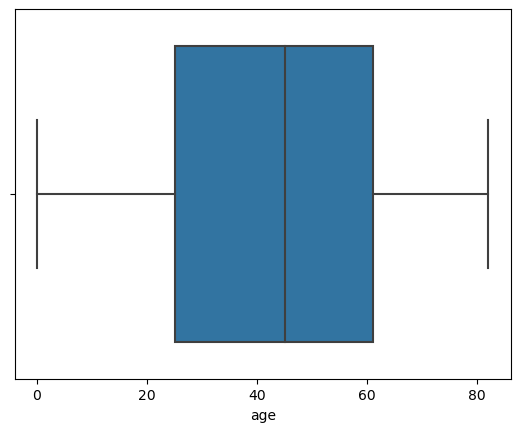

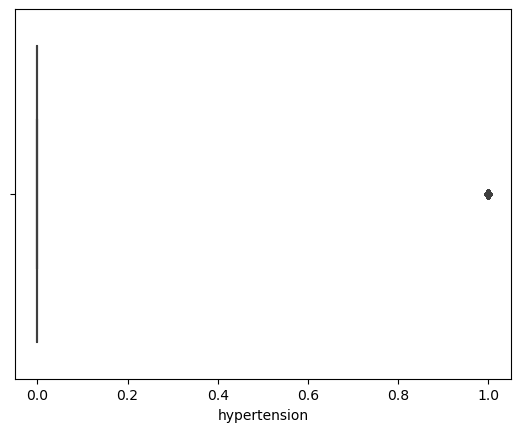

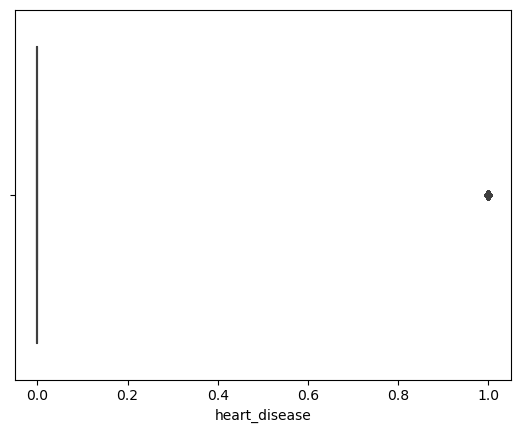

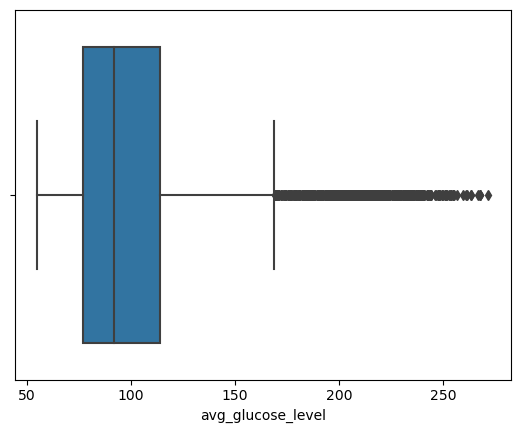

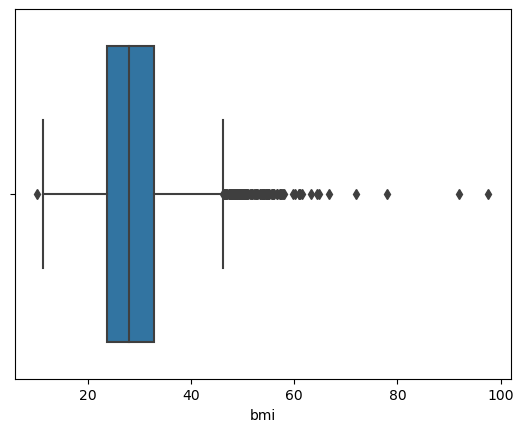

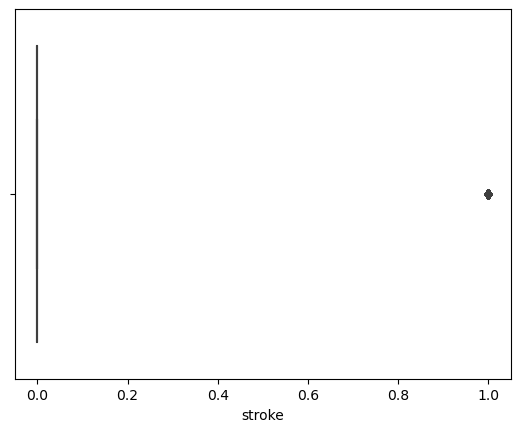

In [17]:
for i in n.columns:
    sns.boxplot(data=n,x=i)
    plt.show()

In [18]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

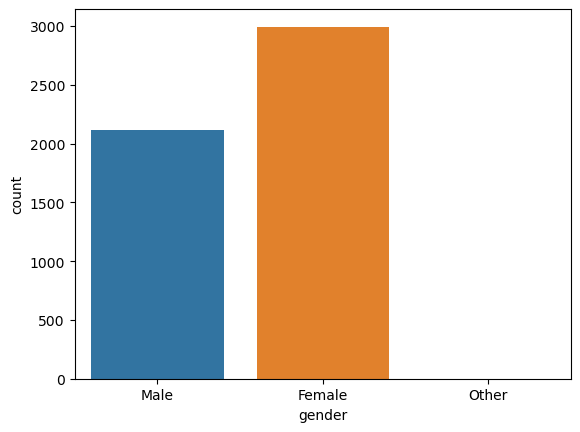

In [19]:
sns.countplot(data=df, x='gender')
plt.show()

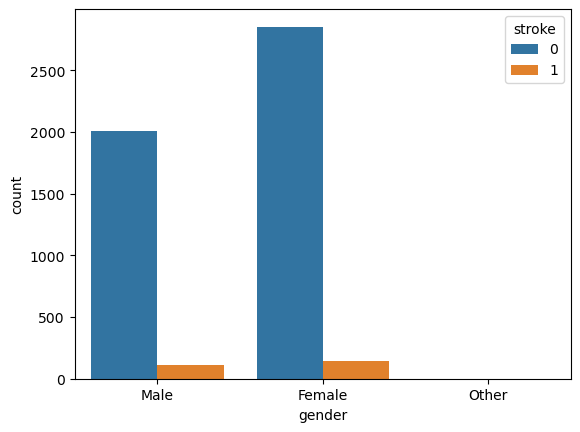

In [20]:
sns.countplot(data=df,x='gender',hue='stroke')
plt.show()

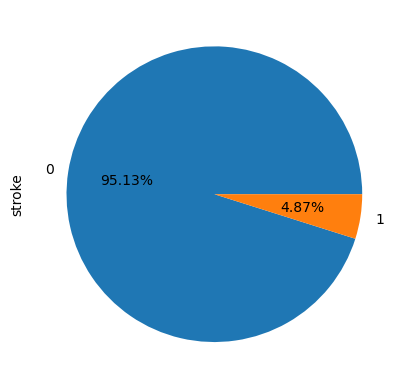

In [21]:
df['stroke'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [22]:
df.groupby('gender').mean()[['age','stroke']]

,age,stroke
gender,,
Female,43.757395,0.047094
Male,42.483385,0.051064
Other,26.000000,0.000000


more men had stroke attack than women

In [23]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

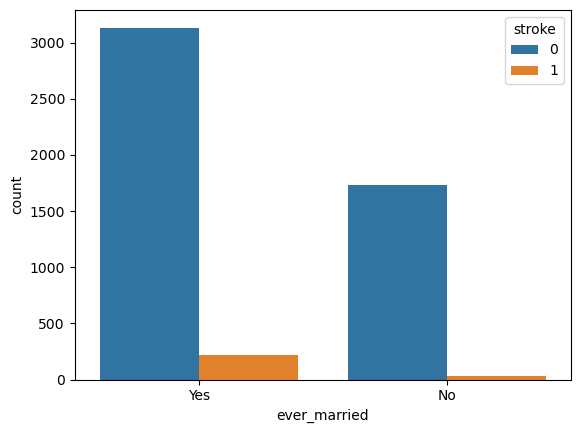

In [24]:
sns.countplot(data=df,x='ever_married',hue='stroke')
plt.show()

In [25]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [26]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

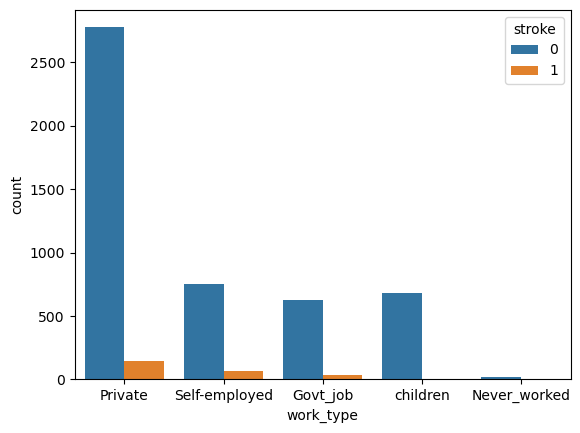

In [27]:
sns.countplot(data=df,x='work_type',hue='stroke')
plt.show()

In [28]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

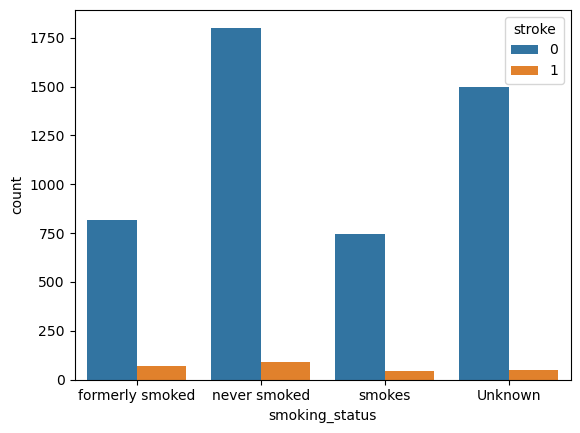

In [29]:
sns.countplot(data=df,x='smoking_status',hue='stroke')
plt.show()

In [30]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [31]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

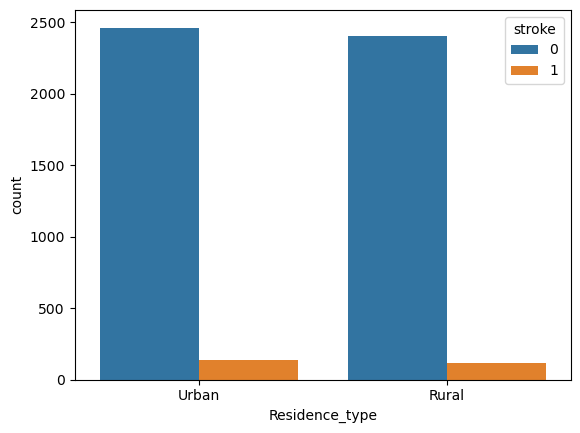

In [32]:
sns.countplot(data=df,x='Residence_type',hue='stroke')
plt.show()

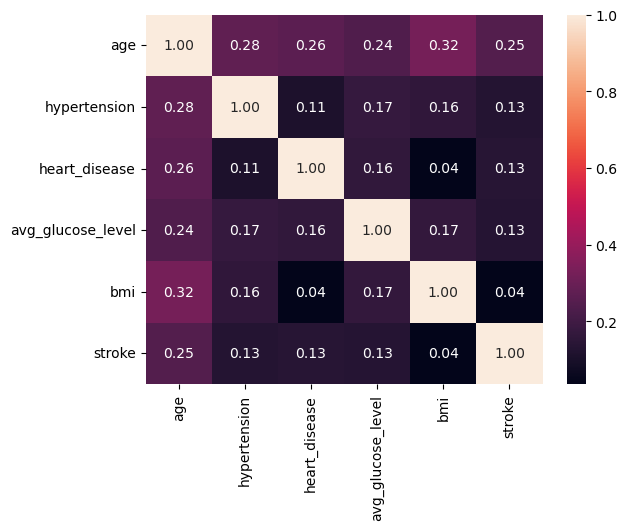

In [33]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [34]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# Feature Selection

In [35]:


# Calculate the missing value percentage for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Set a range of threshold values to iterate over
threshold_values = [10, 20, 30, 40, 50]  # Adjust the range based on your needs

# Iterate over the threshold values and evaluate the impact
for threshold in threshold_values:
    # Identify columns with missing value percentage exceeding the threshold
    non_required_columns = missing_percentage[missing_percentage > threshold].index.tolist()

    # Print the threshold value and non-required columns
    print(f"Threshold: {threshold}%")
    print("Non-required columns:")
    if len(non_required_columns) > 0:
        for column in non_required_columns:
            print(column)
    else:
        print("No non-required columns found.")

    # Evaluate the impact on your analysis or modeling task
    # Perform further analysis or model training using the non-required columns

    print("-----")


Threshold: 10%
Non-required columns:
No non-required columns found.
-----
Threshold: 20%
Non-required columns:
No non-required columns found.
-----
Threshold: 30%
Non-required columns:
No non-required columns found.
-----
Threshold: 40%
Non-required columns:
No non-required columns found.
-----
Threshold: 50%
Non-required columns:
No non-required columns found.
-----


In [36]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [37]:
df['gender']=lr.fit_transform(df['gender'])
df['ever_married']=lr.fit_transform(df['ever_married'])
df['work_type'] =lr.fit_transform(df['work_type'])
df['Residence_type']=lr.fit_transform(df['Residence_type'])
df['smoking_status']=lr.fit_transform(df['smoking_status'])

In [38]:
df.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [39]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [40]:
df.head().values

array([[  1.  ,  67.  ,   0.  ,   1.  ,   1.  ,   2.  ,   1.  , 228.69,
         36.6 ,   1.  ,   1.  ],
       [  0.  ,  61.  ,   0.  ,   0.  ,   1.  ,   3.  ,   0.  , 202.21,
         28.1 ,   2.  ,   1.  ],
       [  1.  ,  80.  ,   0.  ,   1.  ,   1.  ,   2.  ,   0.  , 105.92,
         32.5 ,   2.  ,   1.  ],
       [  0.  ,  49.  ,   0.  ,   0.  ,   1.  ,   2.  ,   1.  , 171.23,
         34.4 ,   3.  ,   1.  ],
       [  0.  ,  79.  ,   1.  ,   0.  ,   1.  ,   3.  ,   0.  , 174.12,
         24.  ,   2.  ,   1.  ]])

In [41]:
stroke_df=df.values
stroke_df

array([[ 1. , 67. ,  0. , ..., 36.6,  1. ,  1. ],
       [ 0. , 61. ,  0. , ..., 28.1,  2. ,  1. ],
       [ 1. , 80. ,  0. , ..., 32.5,  2. ,  1. ],
       ...,
       [ 0. , 35. ,  0. , ..., 30.6,  2. ,  0. ],
       [ 1. , 51. ,  0. , ..., 25.6,  1. ,  0. ],
       [ 0. , 44. ,  0. , ..., 26.2,  0. ,  0. ]])

In [42]:
X =stroke_df[:,0:10] #Predictors
y = stroke_df[:,10] #Target
print(X)
print(y)

[[  1.    67.     0.   ... 228.69  36.6    1.  ]
 [  0.    61.     0.   ... 202.21  28.1    2.  ]
 [  1.    80.     0.   ... 105.92  32.5    2.  ]
 ...
 [  0.    35.     0.   ...  82.99  30.6    2.  ]
 [  1.    51.     0.   ... 166.29  25.6    1.  ]
 [  0.    44.     0.   ...  85.28  26.2    0.  ]]
[1. 1. 1. ... 0. 0. 0.]


In [43]:
print(len(X[0]))

10


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [45]:
X_train

array([[  1.  ,  44.  ,   0.  , ...,  95.46,  31.4 ,   3.  ],
       [  0.  ,  70.  ,   0.  , ..., 158.33,  33.5 ,   2.  ],
       [  0.  ,   1.16,   0.  , ...,  65.01,  17.  ,   0.  ],
       ...,
       [  1.  ,  44.  ,   0.  , ...,  94.71,  28.4 ,   3.  ],
       [  1.  ,  21.  ,   0.  , ..., 120.94,  29.7 ,   1.  ],
       [  0.  ,  58.  ,   1.  , ...,  59.52,  33.2 ,   2.  ]])

In [46]:
X_train.shape

(3577, 10)

In [47]:
X_test

array([[  1.  ,  82.  ,   0.  , ..., 144.9 ,  26.4 ,   3.  ],
       [  1.  ,   4.  ,   0.  , ..., 106.22,  16.7 ,   0.  ],
       [  1.  ,  58.  ,   0.  , ...,  79.95,  25.9 ,   2.  ],
       ...,
       [  0.  ,  38.  ,   0.  , ...,  98.73,  24.3 ,   2.  ],
       [  0.  ,  75.  ,   0.  , ..., 219.39,  33.4 ,   3.  ],
       [  0.  ,  57.  ,   1.  , ...,  63.72,  35.8 ,   3.  ]])

In [48]:
X_test.shape

(1533, 10)

In [49]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as lgr
from sklearn.ensemble import RandomForestClassifier as rfc

In [50]:
feature_names = X_train
feature_names 

array([[  1.  ,  44.  ,   0.  , ...,  95.46,  31.4 ,   3.  ],
       [  0.  ,  70.  ,   0.  , ..., 158.33,  33.5 ,   2.  ],
       [  0.  ,   1.16,   0.  , ...,  65.01,  17.  ,   0.  ],
       ...,
       [  1.  ,  44.  ,   0.  , ...,  94.71,  28.4 ,   3.  ],
       [  1.  ,  21.  ,   0.  , ..., 120.94,  29.7 ,   1.  ],
       [  0.  ,  58.  ,   1.  , ...,  59.52,  33.2 ,   2.  ]])

In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


# Separate the features and the target variable
X = df.drop('stroke', axis=1)  # Replace 'target_variable' with the name of your target variable column
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier
clf = RandomForestClassifier()

# Create the feature selector object
selector = SelectFromModel(clf, threshold='median')

# Perform feature selection
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X_train.columns[selected_feature_indices]

# Print the selected feature names
print("Selected features:")
for feature in selected_feature_names:
    print(feature)


Selected features:
age
work_type
avg_glucose_level
bmi
smoking_status


# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logistic_model = LogisticRegression().fit(X_train,y_train)
ypredicted = logistic_model.predict(X_test)

In [54]:
ypredicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
3605    0
4934    0
4835    0
4105    0
2902    0
Name: stroke, Length: 1022, dtype: int64

# Evaluation for Logistic Regression

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
Varience=np.var(ypredicted)
Varience

0.0

In [58]:
SE=np.mean((np.mean(ypredicted)-y)**2)
bias=SE-Varience
bias

0.0487279843444227

In [59]:
print(confusion_matrix(y_test,ypredicted))

[[960   0]
 [ 62   0]]


In [60]:
print(classification_report(y_test,ypredicted))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [61]:
print('Accuracy score :',accuracy_score(y_test,ypredicted))

Accuracy score : 0.9393346379647749


# KNN Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn=KNeighborsClassifier()

In [64]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
pred=knn.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
3605    0
4934    0
4835    0
4105    0
2902    0
Name: stroke, Length: 1022, dtype: int64

# Evaluation for KNN Classifier

In [67]:
Varience=np.var(pred)
Varience

0.005836374707511079

In [68]:
SE=np.mean((np.mean(pred)-y)**2)
bias=SE-Varience
bias

0.04235392787251885

In [69]:
print(confusion_matrix(y_test,pred))

[[955   5]
 [ 61   1]]


In [70]:
print(accuracy_score(y_test,pred))

0.9354207436399217


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.17      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.55      0.51      0.50      1022
weighted avg       0.89      0.94      0.91      1022



# Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
classifier=DecisionTreeClassifier(max_depth=4)

In [74]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [75]:
Y_pred=classifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Evaluation for Decision Tree Classifier

In [76]:
Varience=np.var(Y_pred)
Varience

0.0009775161706641752

In [77]:
SE=np.mean((np.mean(Y_pred)-y)**2)
bias=SE-Varience
bias

0.04765606749361408

In [78]:
print(confusion_matrix(y_test,Y_pred))

[[960   0]
 [ 61   1]]


In [79]:
print(accuracy_score(y_test,Y_pred))

0.9403131115459883


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022



# Ploting Tree with plot_tree

In [81]:
from sklearn import tree

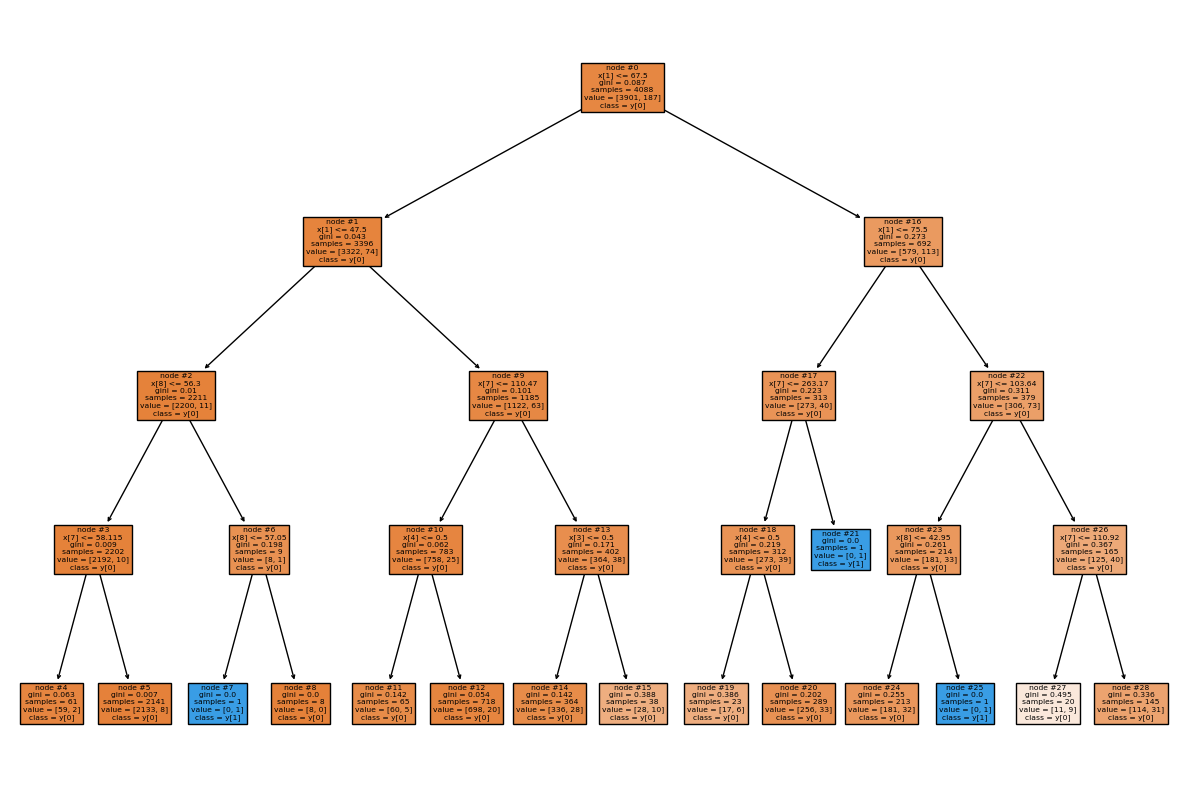

In [82]:
fig=plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True,class_names=True,node_ids=True)
plt.show()

# Random Forest Classifier

## Backward Elimination

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [85]:
classifier=RandomForestClassifier()

In [86]:
classifier.fit(X_test,y_test)

RandomForestClassifier()

In [87]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
y_test

42      1
380     0
3524    0
352     0
4927    0
       ..
929     0
2629    0
663     0
2303    0
3122    0
Name: stroke, Length: 1533, dtype: int64

# Evaluation for Random Forest Classifier

In [89]:
Varience=np.var(y_pred)
Varience

0.047118215522901456

In [90]:
SE=np.mean((np.mean(y_pred)-y)**2)
bias=SE-Varience
bias

-0.0007639285150477168

In [91]:
model = RandomForestClassifier(
    max_depth=2, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22)

model.fit(X_train, y_train)
print('Training Accuracy : ',
    metrics.accuracy_score(y_train, model.predict(X_train))*100)

print('Validation Accuracy : ', metrics.accuracy_score(y_test, model.predict(X_test))*100)


Training Accuracy :  95.1635448700028
Validation Accuracy :  95.04240052185257


In [92]:
print(confusion_matrix(y_test,y_pred))

[[1457    0]
 [   0   76]]


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1457
           1       1.00      1.00      1.00        76

    accuracy                           1.00      1533
   macro avg       1.00      1.00      1.00      1533
weighted avg       1.00      1.00      1.00      1533



In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_pred,y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 100.00


In [95]:
# Model Precision: what percentage of positive tuples are labeled as such? TP / (TP + FP)
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such? TP / (TP + FN)
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0
